#Dados sobre os salários em cidades (por ano fiscal)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Introdução

>No decorrer deste trabalho prático, vamos explorar um dataset que contém dados sobre as despesas salariais dos funcionários municipais das cidades.

>Este dataset inclui pormenores importantes, como a empresa empregadora, os nomes dos funcionários, os cargos, os salários, o pagamento das horas extra e outras compensações.

>Assim sendo, este dataset fornece informações importantes sobre a forma de como os fundos públicos são afectados e utilizados nos diferentes departamentos das cidades.

##Variáveis

1. **Fiscal Year**: Ano fiscal dos dados.
1. **Payroll Number**: Número único para cada entrada na folha de pagamento.
1. **Agency Name**: Nome da agência do funcionário.
1. **Last Name**: Sobrenome do funcionário.
1. **First Name**: Primeiro nome do funcionário.
1. **Mid Init**: Inicial do meio do funcionário.
1. **Agency Start Date**: Data de início do funcionário na agência.
1. **Work Location Borough**: Distrito onde está localizado o local de trabalho principal do funcionário.
1. **Title Description**: Descrição do título do funcionário.
1. **Leave Status as of June 30**: Estado do contrato do funcionário no final do ano fiscal.
1. **Base Salary**: Salário base do funcionário.
1. **Pay Basis**: Método de pagamento do funcionário (hora, dia, ano).
1. **Regular Hours**: Horas regulares trabalhadas pelo funcionário.
1. **Regular Gross Paid**: Pagamento bruto regular do funcionário.
1. **OT Hours**: Horas extras trabalhadas pelo funcionário.
1. **Total OT Paid**: Pagamento total de horas extras do funcionário.
1. **Total Other Pay**: Outras compensações além do salário base e horas extras.

#Tratamento dos dados

##Instalação biblioteca

Começamos por fazer a instalação da biblioteca "**pandas-profiling**", esta biblioteca é utilziada para gerar relatórios detalhados de análise de dados utilizando o pandas.

In [2]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b4cbaddf3d97396c57580edcf0838e6e84a84588530ef6a9fe98f8c362628c46
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

##Imports
De seguida, fazemos algumas importações de algumas bibliotecas que serão essenciais para o processamento dos dados, realização da análise dos dados e para a construção do modelo.


In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import expon
from datetime import datetime
from scipy.stats import poisson

## Carregamento do Dataset

Após realizarmos as importações das bibliotecas, procedemos ao carregamento do dataset com a qual iremos trabalhar.


In [25]:
#Carrega os dados do dataset
col_names = ['Fiscal Year', 'Payroll Number', 'Agency Name', 'First Name', 'Last Name', 'Mid Init', 'Agency Start Date', 'Work Location Borough', 'Title Description','Leave Status as of June 30', 'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours','Total OT Paid','Total Other Paid']
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Citywide Payroll Data (Fiscal Year).csv')
#Para ver os primeiros 5 resultados, se fosse df.trail veriamos os ultimos
df_original.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2022,742.0,DEPT OF ED PEDAGOGICAL,ANTHONY NOEL,JOANNE,A,01/31/1989,OTHER,TEACHER,CEASED,105142.0,per Annum,0.0,0.00,0.0,0.0,5597.31
1,2022,742.0,DEPT OF ED PEDAGOGICAL,ANTHONY TIDD,SHARON,B,09/06/1988,MANHATTAN,GUIDANCE COUNSELOR,CEASED,128409.0,per Annum,0.0,0.00,0.0,0.0,8258.87
2,2022,742.0,DEPT OF ED PEDAGOGICAL,APPELMAN,BROOKE,A,10/20/2015,MANHATTAN,TEACHER,ACTIVE,97469.0,per Annum,0.0,90693.25,0.0,0.0,1486.01
3,2022,742.0,DEPT OF ED PEDAGOGICAL,APUZZO,ANNEMARIE,NaN,02/01/1986,OTHER,TEACHER,CEASED,108811.0,per Annum,0.0,0.00,0.0,0.0,13978.94
4,2022,742.0,DEPT OF ED PEDAGOGICAL,ARBOLINO,ARIANA,M,09/05/2000,MANHATTAN,PRINCIPAL,ACTIVE,169456.0,per Annum,0.0,168222.06,0.0,0.0,16947.18


## Informações Dataset

>Após carregarmos o nosso dataset, por uma questão de obtermos alguma informação a cerca do mesmo, tal como o número de registos, quais as nossas variaveis e os seus respetivos tipos utilizamos a função **info**.

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739423 entries, 0 to 1739422
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 225.6+ MB


##Estatísticas dos campos do dataset
Para obtermos algumas estatísticas em relação as features do dataset, utilizamos a função **describe**.

Está função retorna para cada feature as seguintes estátisticas:
1. **Número de registos** - Contagem do número de entradas para cada feature.
1. **Média** - Indica o valor central típico dos dados e ajuda a entender o comportamento médio da feature.
1. **Desvio Padrão** - Indica o quanto os valores se afastam da média. Quanto maior o desvio padrão, maior é a dispersão dos valores em relação à média.
1. **O valor minímo** - Valor mínimo observado em cada coluna.
1. **O 1º Quartil** - É o valor que divide a distribuição em 25% dos dados inferiores.
1. **Mediana** - É o valor do meio em uma distribuição de dados.
1. **O 3ª Quartil** -  É o valor que divide a distribuição em 25% dos dados superiores.
1. **O valor Máximo** - Valor máximo observado em cada coluna.

In [6]:
#Lista os dados com estatisticas das colunas
df_original.describe().round(2)

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1739423.00,1739423.00,1739423.00,1739423.00,1739423.00,1739423.00,1739423.00,1739423.00
mean,2021.99,572.46,49378.56,637.99,45105.45,71.55,3890.48,4288.83
std,0.80,303.93,47356.96,883.73,43930.96,196.91,11639.09,7361.61
min,2021.00,2.00,1.00,-1872.77,-205451.85,-132.00,-7096.64,-205944.48
25%,2021.00,300.00,33.18,0.00,2589.12,0.00,0.00,0.79
50%,2022.00,742.00,46325.00,0.00,35896.32,0.00,0.00,955.97
75%,2023.00,747.00,88604.00,1820.00,81859.01,0.00,1.51,5711.12
max,2023.00,996.00,414707.00,6666.00,429477.39,3692.90,255999.85,479358.00


In [7]:
#Manter o df original e criar um novo para manipular dados
df = df_original

##  Criação de novas variáveis

Após criarmos o dataframe que servirá para manipular os dados, decidimos criar 2 novas variáveis sendo elas:

1. **Total Hours Worked** - Esta variável irá receber o valor do total de horas trabalhadas pelos trabalhadores.
1. **Total Earnings** - Esta variável irá receber o valor total dos ganhos obtidos pelos trabalhadores, somando o salário bruto, com os pagamentos das horas extras e outros pagamentos.


In [8]:
#Conversão dos campos e adiciona os campos ao dataset

df['Total Hours Worked'] = df['Regular Hours'] + df['OT Hours']

df['Total Earnings'] = df['Regular Gross Paid'] + df['Total OT Paid'] + df['Total Other Pay']

salary_categories = {
    (0, 25000): 'Category I',
    (25001, 50000): 'Category II',
    (50001, 75000): 'Category III',
    (75001, 100000): 'Category IV',
    (100001, 125000): 'Category V',
    (125001, 150000): 'Category VI',
    (150001, 175000): 'Category VII',
    (175001, 200000): 'Category VIII',
    (200001, float('inf')): 'Category IX'
}

# Criando uma função para atribuir categorias salariais com base nos valores
def categorize_salary(salary):
    for salary_range, category in salary_categories.items():
        if salary_range[0] <= salary <= salary_range[1]:
            return category
    return 'No category'

# Aplicando a função para criar a nova variável de texto
df['Salary Category'] = df['Total Earnings'].apply(categorize_salary)


## Eliminar variáveis

Inseridas as novas variáveis, optamos por apagar a variável inicial relativas ao Mid Init (Inicial do meio do funcionário), pois não achamos que seja um campo necessário para a análise do dataset.


In [9]:
#REMOVER O Mid Init
df = df.drop(["Mid Init"], axis=1)

Após adicionarmos as novas variáveis e eliminarmos a respetiva variável, fizemos uma consulta do dataframe, para que pudessemos ver se as alterações tinham sido bem sucedidas.

In [10]:
df

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Hours Worked,Total Earnings,Salary Category
0,2022,742.0,DEPT OF ED PEDAGOGICAL,ANTHONY NOEL,JOANNE,01/31/1989,OTHER,TEACHER,CEASED,105142.00,per Annum,0.0,0.00,0.00,0.00,5597.31,0.00,5597.31,Category I
1,2022,742.0,DEPT OF ED PEDAGOGICAL,ANTHONY TIDD,SHARON,09/06/1988,MANHATTAN,GUIDANCE COUNSELOR,CEASED,128409.00,per Annum,0.0,0.00,0.00,0.00,8258.87,0.00,8258.87,Category I
2,2022,742.0,DEPT OF ED PEDAGOGICAL,APPELMAN,BROOKE,10/20/2015,MANHATTAN,TEACHER,ACTIVE,97469.00,per Annum,0.0,90693.25,0.00,0.00,1486.01,0.00,92179.26,Category IV
3,2022,742.0,DEPT OF ED PEDAGOGICAL,APUZZO,ANNEMARIE,02/01/1986,OTHER,TEACHER,CEASED,108811.00,per Annum,0.0,0.00,0.00,0.00,13978.94,0.00,13978.94,Category I
4,2022,742.0,DEPT OF ED PEDAGOGICAL,ARBOLINO,ARIANA,09/05/2000,MANHATTAN,PRINCIPAL,ACTIVE,169456.00,per Annum,0.0,168222.06,0.00,0.00,16947.18,0.00,185169.24,Category VIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739418,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,JUAN,10/02/2017,QUEENS,PAINTER,ACTIVE,315.07,per Day,1820.0,81918.20,1149.00,77575.47,3752.01,2969.00,163245.68,Category VII
1739419,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,LUIS,08/21/2017,BRONX,PAINTER,ACTIVE,315.07,per Day,1820.0,81918.20,1037.75,70063.81,3206.96,2857.75,155188.97,Category VII
1739420,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,PAUL,10/07/2019,QUEENS,SUPERVISOR PAINTER,ACTIVE,360.08,per Day,1820.0,93620.80,908.00,70035.56,617.28,2728.00,164273.64,Category VII
1739421,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA BERMEO,HUGO,07/06/2022,QUEENS,PAINTER,ACTIVE,315.07,per Day,1771.0,79082.62,1005.75,67869.89,0.00,2776.75,146952.51,Category VI


## Verificar dados nulos

Tal como foi referido anteriormente, após adicionarmos novas variavéis e eliminarmos váriaveis não necessárias para a análise, vamos agora verificar a quantidade de dados nulos existentes do dataset.

Assim sendo, conseguimos verificar que a grande maioria das colunas não possui valores nulos, no entanto as colunas do **Last Name** e **First Name** possuem cerca de **11150** valores nulos.


In [11]:
# Retorna o número de campos nulos
df.isnull().sum()

Fiscal Year                       0
Payroll Number                    0
Agency Name                       0
Last Name                     11143
First Name                    11172
Agency Start Date                 0
Work Location Borough             7
Title Description                12
Leave Status as of June 30        0
Base Salary                       0
Pay Basis                         0
Regular Hours                     0
Regular Gross Paid                0
OT Hours                          0
Total OT Paid                     0
Total Other Pay                   0
Total Hours Worked                0
Total Earnings                    0
Salary Category                   0
dtype: int64

## Limpeza dos dados nulos
Após verificarmos a existência de alguns dados nulos nas colunas de **Work Location Borough**, **Title Description**, **Last Name** e **First Name**, vamos agora proceder ao tratamento e limpeza desses dados, passando esses campos não nulos e para campos com o valos **Without Information**.

In [12]:
# Limpeza dos campos nulos existentes

# Preencher valores nulos nas colunas com "Without Information"
df['Work Location Borough'] = df['Work Location Borough'].fillna("Without Information")
df['Title Description'] = df['Title Description'].fillna("Without Information")
df['First Name'] = df['First Name'].fillna("Without Information")
df['Last Name'] = df['Last Name'].fillna("Without Information")

df.isnull().sum()

Fiscal Year                   0
Payroll Number                0
Agency Name                   0
Last Name                     0
First Name                    0
Agency Start Date             0
Work Location Borough         0
Title Description             0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
Total Hours Worked            0
Total Earnings                0
Salary Category               0
dtype: int64

## Conversão do tipo de dados

Para que possamos fazer uma melhor análise do dataset vamos proceder à alteração do tipo de dados associados ao **Agency Start Date**.
Primeiro vamos começar por fazer uma verificação nesta coluna para precaver a existência de dados irrealistas, ou seja, **datas superiores à data atual**, de seguida vamos então alterar esta coluna para o tipo **date**.

In [13]:
data_atual = datetime.now()
df['Agency Start Date'] = pd.to_datetime(df['Agency Start Date'], errors='coerce')
df.loc[df['Agency Start Date'] > data_atual, 'Agency Start Date'] = 'Without Information'
df['Agency Start Date'] = pd.to_datetime(df['Agency Start Date'])

##Observações

Após observarmos o nosso Dataframe, chegamos à conclusão que a média do **Base Salary** dos funcionários é de **93940.19$**.

Da população estudada, estão em ativo **87670** funcionários, sendo esse valor referente a **96.64%** da população estudada.

No que toca à média dos ganhos dos funcionários com as horas extra elaboradas, os funcionários recebem em média **9540.35$** anualmente pelas horas extra trabalhadas.

In [14]:
meanBaseSalary = df["Base Salary"].mean().round(2)

active_count = df[df['Leave Status as of June 30'].str.contains('ACTIVE', case=False)].shape[0]

meanTotalOTPaid = df["Total OT Paid"].mean().round(2)
total_people = df.shape[0]
meanActive= round((active_count / total_people) * 100, 2)

print("A média do salário base dos funcionários é: ", meanBaseSalary, "$")
print("O Número de funcionários que estão ativos é: ", active_count, ", sendo uma percentagem de ", meanActive, "% da população estudada.")
print("A média de ganhos dos funcionários com as horas extra é: ", meanTotalOTPaid, "$")

A média do salário base dos funcionários é:  49378.56 $
O Número de funcionários que estão ativos é:  1428217 , sendo uma percentagem de  82.11 % da população estudada.
A média de ganhos dos funcionários com as horas extra é:  3890.48 $


#Gráficos dos Dados

## Gráfico de Correlação

O primeiro gráfico que vamos analisar é um gráfico de correlação, este fornece informações acerca das relações entre as diferentes variáveis do dataset.

Assim sendo, podemos verificar que:



*   A correlação entre os Total Earnings e Regular Hours é positiva e forte (**0,99**), isto indica que o aumento nas horas regulares de trabalho leva a um aumento significativo nos ganhos totais.
*   Total Hours Worked e Regular Hours: Já a correlação entre Total Hours Worked e Regular Hours é tal como a anterior positiva e forte (**0,99**), o que nos indica que a maioria das horas trabalhadas são horas regulares.
*   Total Earnings e Base Salary: A correlação entre Total Earnings e Base Salary é também positiva e forte, embora não seja tão eleveda com as anteriores (**0,78**), e através desta correlação, é nos demonstrados que o salário base é um fator importante que determina os ganhos totais.




<ipython-input-15-ee6113b1d88f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


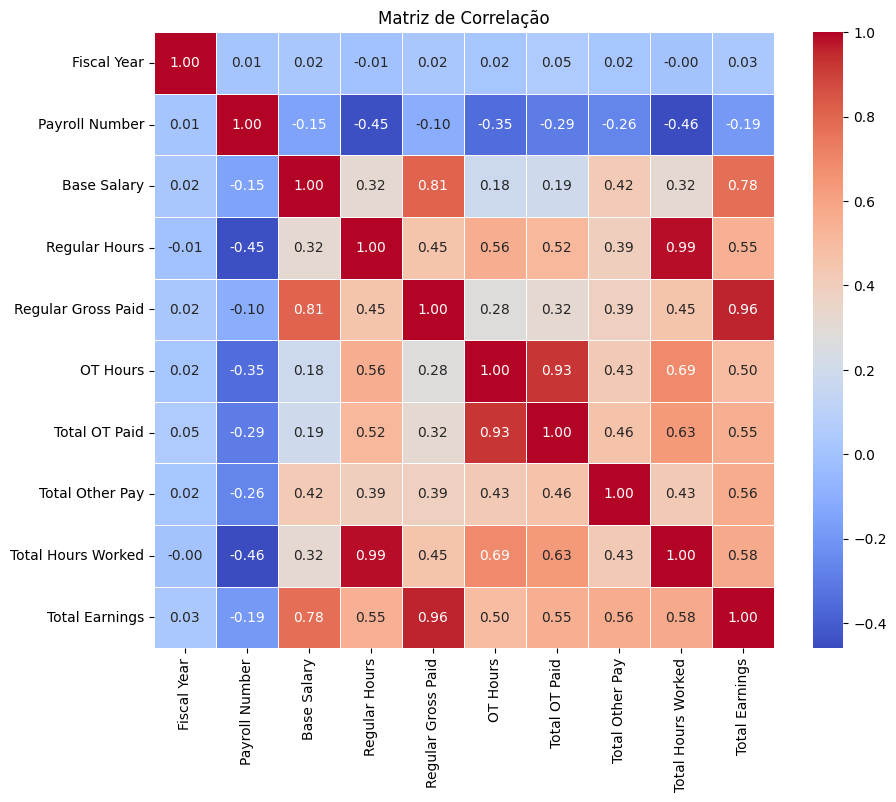

In [15]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um heatmap com a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

##Gráfico matricial Scatterplot

No gráfico seguinte, podemos observar que existem alguns pontos que se destacam dos demais, ou seja, alguns **Outliers** esses pontos são referentes a alguns casos excecionais de funcionários que tem mais de **4000** e **6000** horas trabalhadas, sem contar com as horas extra, ou seja, funcionários que trabalham 11 horas e 18 horas respetivamente diariamente, algo que não é muito normal.

No entanto na grande maioria a população analisada encontra-se entre as **1500** e as **2000** horas, sem contar com as horas extra e recebem anualmente um valor inferior ou igual a **100000$**.

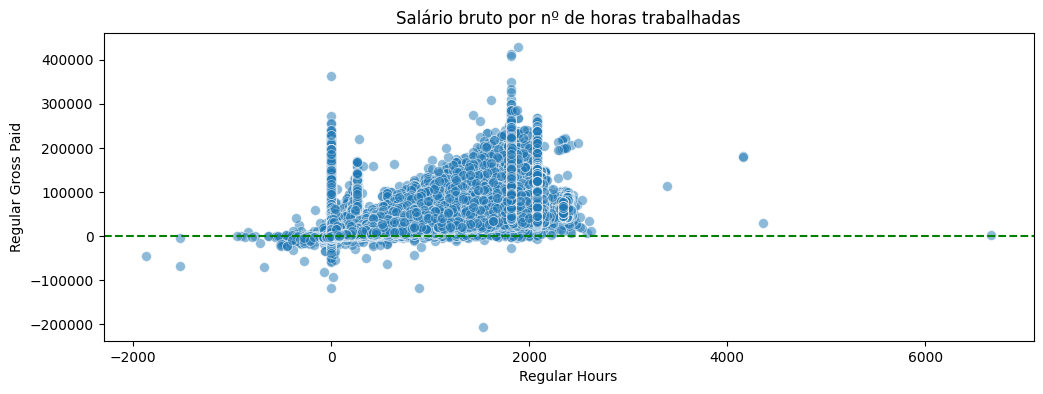

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 4))

sns.scatterplot(ax=ax, data=df, x='Regular Hours', y='Regular Gross Paid', s=50, alpha=0.5)
ax.set_title("Salário bruto por nº de horas trabalhadas")
ax.axhline(y=24.9, linestyle='--', color='green')

In [17]:
#Encontrar os outliers
df[df['Regular Hours'] > 4000]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Hours Worked,Total Earnings,Salary Category
1958,2021,72.0,DEPARTMENT OF CORRECTION,JOHNSON,DAVID,2011-05-26,QUEENS,CORRECTION OFFICER,ACTIVE,92073.00,per Annum,4160.0,181564.57,284.00,11687.42,27117.90,4444.00,220369.89,Category IX
1065172,2022,72.0,DEPARTMENT OF CORRECTION,JOHNSON,DAVID,2011-05-26,QUEENS,CORRECTION OFFICER,ACTIVE,92073.00,per Annum,4160.0,179409.65,1442.02,56289.64,39839.04,5602.02,275538.33,Category IX
1236880,2023,56.0,POLICE DEPARTMENT,PIERCE,CARDEN,2016-06-10,MANHATTAN,POLICE CADET,ON LEAVE,16.80,per Hour,6666.0,3009.58,0.00,0.00,0.00,6666.00,3009.58,Category I
1691699,2023,841.0,DEPARTMENT OF TRANSPORTATION,OTERO JR,CARLOS,2018-02-12,BRONX,ASSISTANT CITY HIGHWAY REPAIRER,ON LEAVE,28.57,per Hour,4360.0,30176.32,0.00,0.00,2423.00,4360.00,32599.32,Category II


##Histograma
No seguinte histograma, é possivel verificarmos que uma grande parte da população estudada usufrui de um salário base compreendido entre os **0** e os **7500$**, estando nesta situação um total de **686759** funcionários, que representam **39,48%** da população estudada.

O intervalo de salário mais comum é (0, 7500] com 686759 funcionários, representando 39.48% do total.


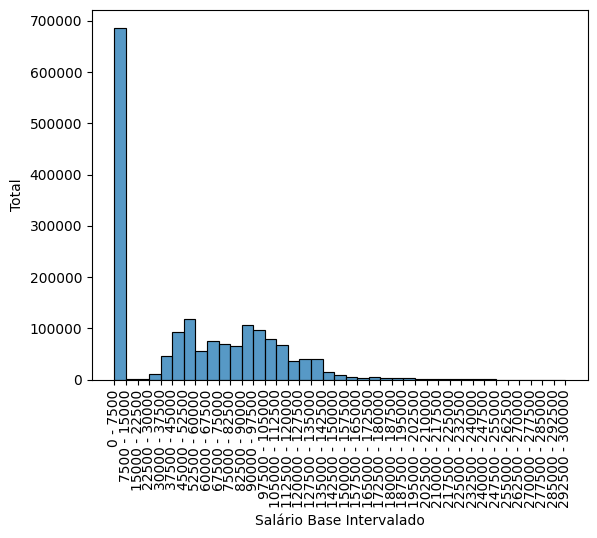

In [18]:
total_funcionarios = len(df)
intervalos = pd.cut(df['Base Salary'], bins=range(0, 300000, 7500))
contagem_intervalos = intervalos.value_counts()
intervalo_mais_comum = contagem_intervalos.idxmax()
contagem_mais_comum = contagem_intervalos.max()
percentagem_mais_comum = (contagem_mais_comum / total_funcionarios) * 100

print(f"O intervalo de salário mais comum é {intervalo_mais_comum} com {contagem_mais_comum} funcionários, representando {percentagem_mais_comum:.2f}% do total.")

sns.histplot(df['Base Salary'], bins=range(0, 300000, 7500))
plt.xlabel("Salário Base Intervalado")
plt.ylabel("Total")

plt.xticks(ticks=range(0, 300000, 7500), labels=[f"{i} - {i+7500}" for i in range(0, 300000, 7500)], rotation='vertical')
plt.show()




##Gráfico de barras horizontais
Através da análise deste gráfico de barras horizontais conseguimos comprovar que a grande maioria da população estudada neste dataset se encontram **Ativas** com uma Percentagem de **82.1%** que diz respeito a **1428217** funcionários, por outro lado **15.6%** dos funcionários, ou seja, **270749** já **terminaram** o seu contrato e **1.3%** encontram-se **em licença**.

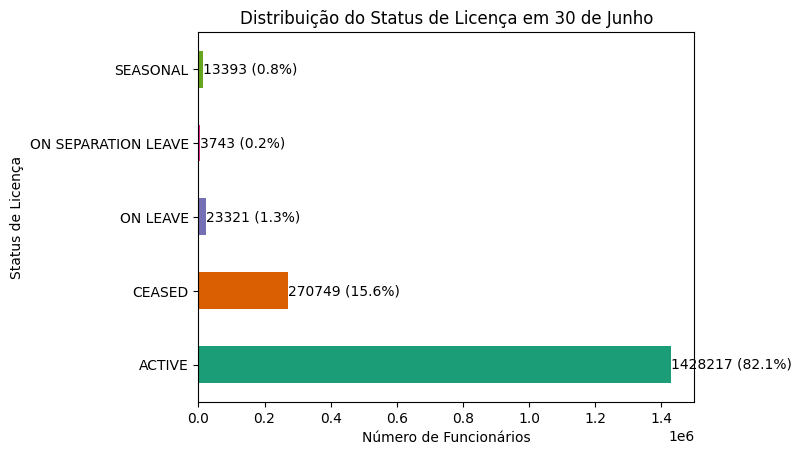

In [19]:
# Agrupar os dados e contar cada opção
grouped_data = df.groupby('Leave Status as of June 30').size()
# gráfico
ax = grouped_data.plot(kind='barh', color=sns.color_palette('Dark2'))
# Adiciona as percentagens
total = sum(grouped_data)
for i, count in enumerate(grouped_data):
    percentage = '{:.1f}%'.format(100 * count / total)
    plt.text(count + 0.1, i, f'{count} ({percentage})', va='center')

plt.title('Distribuição do Status de Licença em 30 de Junho')
plt.xlabel('Número de Funcionários')
plt.ylabel('Status de Licença')
plt.show()


##Gráfico de Pizza

Através da análise deste gráfico de pizza podemos tirar algumas conclusões no que toca a distribuição dos cargos da população que está a ser estudada.

Neste gráfico, podemos observar que existem duas profissões que se destacam das demais, a profissão mais exercida entre a população estudada é **professor por sessões** com **16.9%**, seguida pelos **professores** com **10.5%**, para além destas a fechar o top 3 encontra-se a profissão de **Trabalhador eleitoral**, com **6.2%**

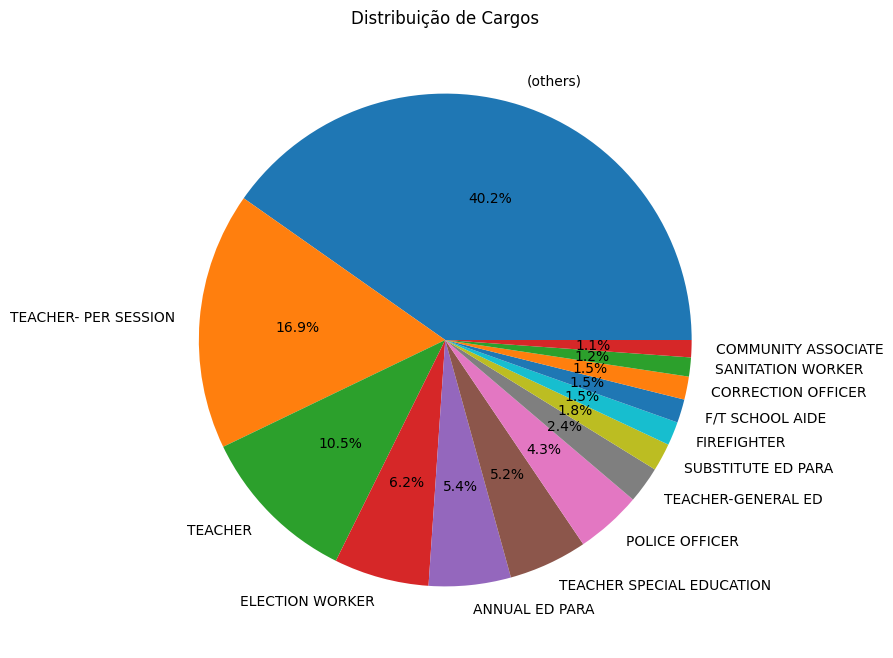

In [20]:
jobCounts = df['Title Description'].value_counts()
# Identifica os cargos com menos de 1% de trabalhadores
otherJobs = jobCounts[jobCounts / len(df) < 0.01]
#Substituir os cargos com menos de 1% de trabalhadores por "others"
df['Title Description'] = df['Title Description'].apply(lambda x: '(others)' if x in otherJobs else x)
#Volta a contar os cargos já com o "others" incluido
jobCounts = df['Title Description'].value_counts()

plt.figure(figsize=(8, 8))
jobCounts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Cargos')
plt.ylabel('')
plt.show()

##Gráfico de boxplot

Através da análise deste gráfico de boxplot conseguimos tirar conclusões acerca da dispersão dos salários nos diferentes concelhos.

Assim sendo, podemos concluir que os maiores salários são oferecidos em **Washington DC** e que em **Dutchess**, **MANHATTAN**, **ALBANY** e **NASSAU** é onde existe uma maior dispersão de salários entre os trabalhadores podendo esta ir dos **0** aos **90000**, com a exceção de **ALBANY** onde estes variam entre os **65000** e os **130000$** . Nos restantes concelhos a dispersão entre os salários não é muito elevada praticando quase todos eles o mesmo intervalo de salários.  

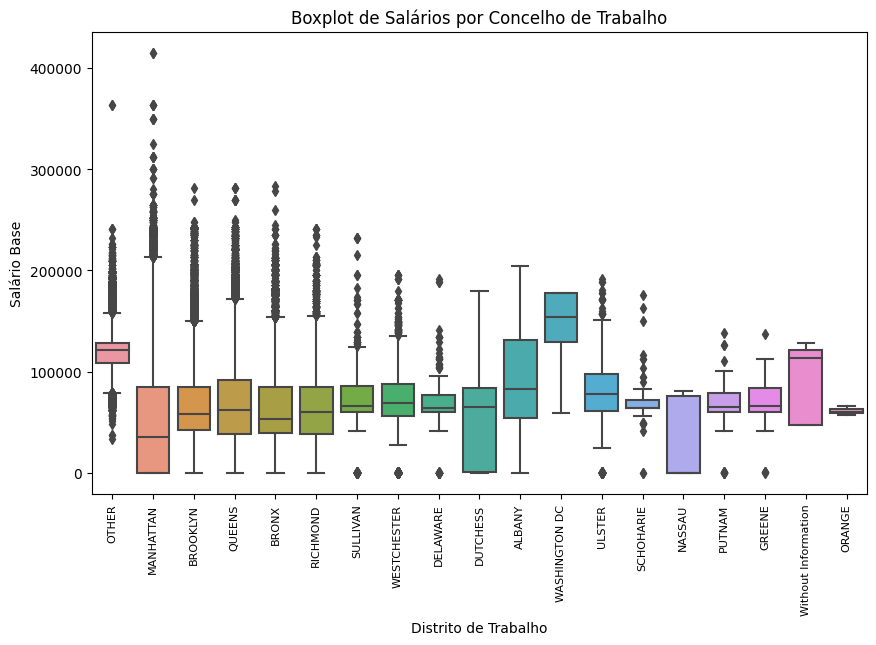

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Work Location Borough', y='Base Salary', data=df)
plt.xlabel('Distrito de Trabalho')
plt.ylabel('Salário Base')
plt.title('Boxplot de Salários por Concelho de Trabalho')
plt.xticks(rotation=90, fontsize=8)
plt.show()

##Gráfico de Pontos

Através da análise deste gráfico de pontos conseguimos tirar conclusões acerca da média de horas extra realizadas por trabalho.

Assim sendo, através deste gráfico podemos concluir que os dois trabalhos mais exercidos da população estudada tem um média de **0** horas extra trabalhadas, no entanto o trabalho que realizou mais horas extra no decorrer dos anos fiscais foram os **bombeiros** com cerca de **600** horas extra.

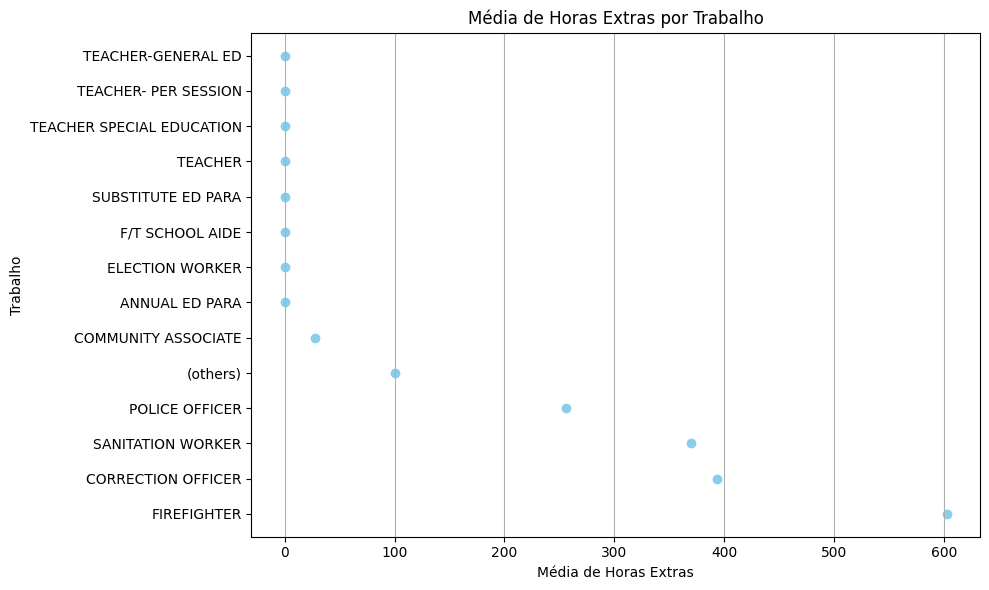

In [22]:
#Calcular a média das horas extras para cada trabalho
average_OT_by_job = df.groupby('Title Description')['OT Hours'].mean().sort_values(ascending=False)

#gráfico
plt.figure(figsize=(10, 6))
plt.scatter(average_OT_by_job.values, average_OT_by_job.index, color='skyblue')
plt.xlabel('Média de Horas Extras')
plt.ylabel('Trabalho')
plt.title('Média de Horas Extras por Trabalho')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

##Gráfico distribuição exponencial

Através da análise deste gráfico distribuição exponencial conseguimos tirar conclusões acerca do total dos ganhos obtidos pelos funcionários.

Assim sendo, através deste gráfico podemos concluir que a maioria dos ganhos está concentrada nos valores menores, ou seja, dos **0** aos **100000$**, com uma grande descida a partir dos **120000 a 130000**, provocando desta forma uma pequena de quantidade de funcionários que aufere mais do que esses valores anualmente.

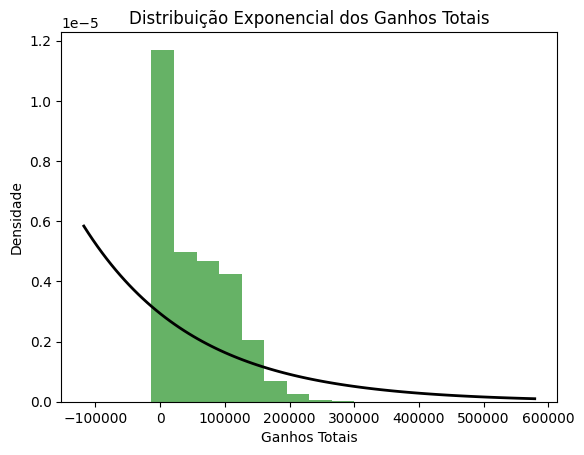

In [23]:
loc, scale = expon.fit(df['Total Earnings'].dropna())

x = np.linspace(df['Total Earnings'].min(), df['Total Earnings'].max(), 100)
pdf = expon.pdf(x, loc=loc, scale=scale)

plt.hist(df['Total Earnings'].dropna(), bins=20, density=True, alpha=0.6, color='g')

plt.plot(x, pdf, 'k-', linewidth=2)

plt.xlabel('Ganhos Totais')
plt.ylabel('Densidade')
plt.title('Distribuição Exponencial dos Ganhos Totais')
plt.show()


## Gráfico Distribuição de Poisson
O seguinte gráfico de densidade de probabilidade mostra-nos a distribuição dos anos em que os funcionários começaram a trabalhar nas empresas e a probabilidade de um funcionário ter inicíado a sua atividade em um determinado ano.

Assim sendo, podemos verificar que o pico de contratações teve origem em **2010**, sendo que a partir desse ano existe uma **diminuição gradual**.

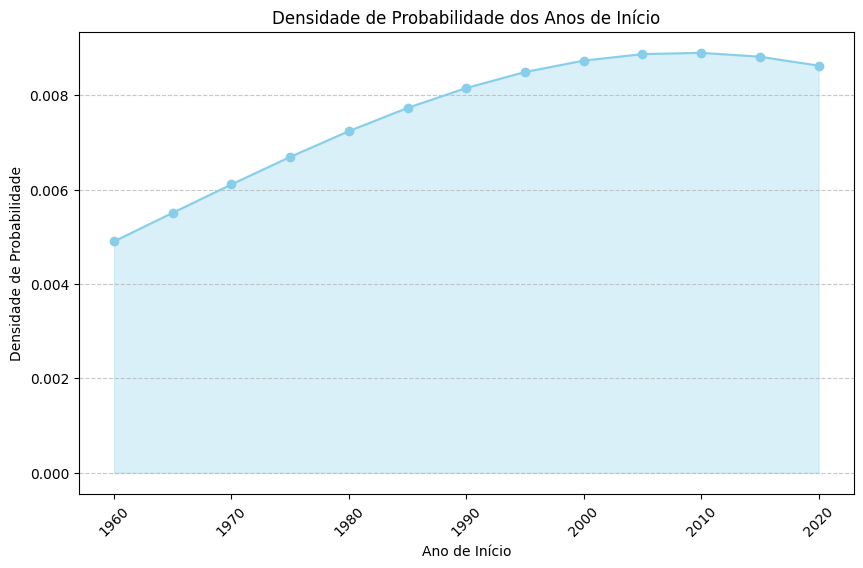

In [24]:
# Extrair o ano do 'Agency Start Date'
start_date_year = df['Agency Start Date'].dt.year
# Definir o ano de incio
start_years = np.arange(1960, start_date_year.max() + 1, 5)
# Calcular o número de funcionários por ano
yearly_starts_count = start_date_year.value_counts().sort_index()
# Calcular a média dos anos de início para ajustar a distribuição de Poisson
mean_starts = np.mean(start_date_year)
# Calcular a densidade de probabilidade de acordo com a distribuição de Poisson para os anos desejados
probability_density = poisson.pmf(start_years, mean_starts)

plt.figure(figsize=(10, 6))
plt.plot(start_years, probability_density, marker='o', color='skyblue')
plt.fill_between(start_years, probability_density, color='skyblue', alpha=0.3)
plt.title('Densidade de Probabilidade dos Anos de Início')
plt.xlabel('Ano de Início')
plt.ylabel('Densidade de Probabilidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
